In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Problem statement

Output variable -> y  
y -> Whether the client has subscribed a term deposit or not   
Binomial ("yes" or "no")


###### Read Dataset

In [2]:
Bank_data = pd.read_csv('bank-full.csv')
Bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


###### EDA

In [3]:
Bank_data.shape

(45211, 17)

In [4]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
Bank_data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [7]:
Bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Check duplicates
Bank_data[Bank_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [9]:
# Checking data range
Bank_data[['age','balance','duration','campaign','pdays','previous']].agg(['min','max'])

,age,balance,duration,campaign,pdays,previous
min,18,-8019,0,1,-1,0
max,95,102127,4918,63,871,275


######  Checking unique values to find whether special characters, invalid entries are present in the dataset.

###### 1) Age column

In [10]:
Bank_data['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

- no special characters & invalid entries found.

###### 2) Job Column

In [11]:
Bank_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

- invalid entry = 'unknown'

In [12]:
# all unknown entries present in job column.
Bank_data[Bank_data['job'] == ('unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,unknown,no
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,unknown,no
1072,29,unknown,single,primary,no,50,yes,no,unknown,7,may,50,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,unknown,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,unknown,yes
44742,64,unknown,married,unknown,no,2799,no,no,telephone,9,sep,378,4,-1,0,unknown,no
44970,28,unknown,single,unknown,no,326,no,no,cellular,11,oct,450,1,231,1,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


In [13]:
# Calculating mode value for job column.
Bank_data['job'].mode()[0]

'blue-collar'

In [14]:
# Imputing mode value
Bank_data['job'].replace('unknown' , 'blue-collar', inplace=True)

In [15]:
Bank_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

###### 3) Marital Column

In [16]:
Bank_data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

- no special characters & invalid entries found.

###### 4) Education Column

In [17]:
Bank_data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

- invalid entries = 'unknown'

In [18]:
# All unknown entries present in the education column.
Bank_data[Bank_data['education'] == ('unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,unknown,no,3308,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,77,blue-collar,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no


In [19]:
# Calculating model mode value for eduction column.
Bank_data['education'].mode()

0    secondary
Name: education, dtype: object

In [20]:
# Imputing mode value.
Bank_data['education'].replace('unknown', 'secondary', inplace=True)

In [21]:
Bank_data['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

###### 5) Default Column

In [22]:
Bank_data['default'].unique()

array(['no', 'yes'], dtype=object)

- no special characters & invalid entries found.

###### 6) Balance Column

In [23]:
Bank_data['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

- no special characters & invalid entries found.

###### 7) Housing column

In [24]:
Bank_data['housing'].unique()

array(['yes', 'no'], dtype=object)

- no special characters & invalid entries found.

###### 8) Loan Column

In [25]:
Bank_data['loan'].unique()

array(['no', 'yes'], dtype=object)

- no special characters & invalid entries found.

###### 9) Contact Column

In [26]:
Bank_data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

- invalid entry = 'unknown'

In [27]:
# all unknown entries present in the contact column. 
Bank_data[Bank_data['contact'] == ('unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,self-employed,single,secondary,no,1031,no,no,unknown,20,oct,7,1,-1,0,unknown,no
45062,58,retired,married,primary,no,742,no,no,unknown,20,oct,5,1,-1,0,unknown,no
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,-1,0,unknown,no
45135,53,blue-collar,married,primary,no,1294,no,no,unknown,28,oct,71,1,-1,0,unknown,no


In [28]:
# Find mode
Bank_data['contact'].mode()

0    cellular
Name: contact, dtype: object

In [29]:
#Imputing mode value.
Bank_data['contact'].replace('unknown', 'cellular', inplace=True)

In [30]:
Bank_data['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

###### 10) Day Column

In [31]:
Bank_data['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

- no special characters & invalid entries found.

###### 11) Month Column

In [32]:
Bank_data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

- no special characters & invalid entries found.

###### 12) Duration Column

In [33]:
Bank_data['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

- no special characters & invalid entries found.

###### 13) Campaign Column

In [34]:
Bank_data['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

- no special characters & invalid entries found.

###### 14) pdays column

In [35]:
Bank_data['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

- no special characters & invalid entries found.

###### 15) Previous column

In [36]:
Bank_data['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

- no special characters & invalid entries found.

###### 16) poutcome column

In [37]:
Bank_data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

- invalid entries = 'unknown' , 'other'

In [38]:
# all unknown entries present on the poutcome column.
Bank_data[Bank_data['poutcome'] == ('unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


- Too many unknown entries present in the column

In [39]:
#All other entries present in the poutcome column.
Bank_data[Bank_data['poutcome'] == ('other')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24086,44,blue-collar,married,secondary,no,1324,yes,no,telephone,25,oct,119,1,89,2,other,no
24122,26,technician,single,tertiary,no,172,no,yes,telephone,4,nov,21,1,140,4,other,no
24136,34,management,married,tertiary,no,1770,yes,no,cellular,6,nov,26,1,101,11,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45153,64,retired,married,tertiary,no,2059,no,yes,cellular,9,nov,326,1,95,1,other,no
45165,33,technician,married,tertiary,no,2976,yes,no,cellular,9,nov,465,2,95,12,other,no
45170,19,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no


- In this column there are too many invalid entries so it does not going to add any value in the dataset, so we can drop this column.

In [40]:
# Drop poutcome column
Bank_data.drop('poutcome', axis=1, inplace=True)

###### 17) y column

In [41]:
Bank_data['y'].unique()

array(['no', 'yes'], dtype=object)

- no special characters & invalid entries found.

#### visualization

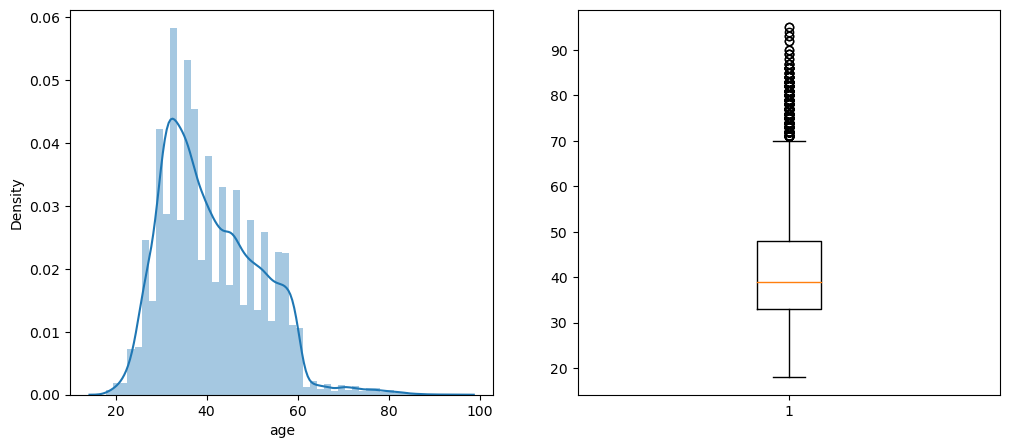

In [42]:
# Age column
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(Bank_data['age']);
plt.subplot(1,2,2)
plt.boxplot(Bank_data['age']);

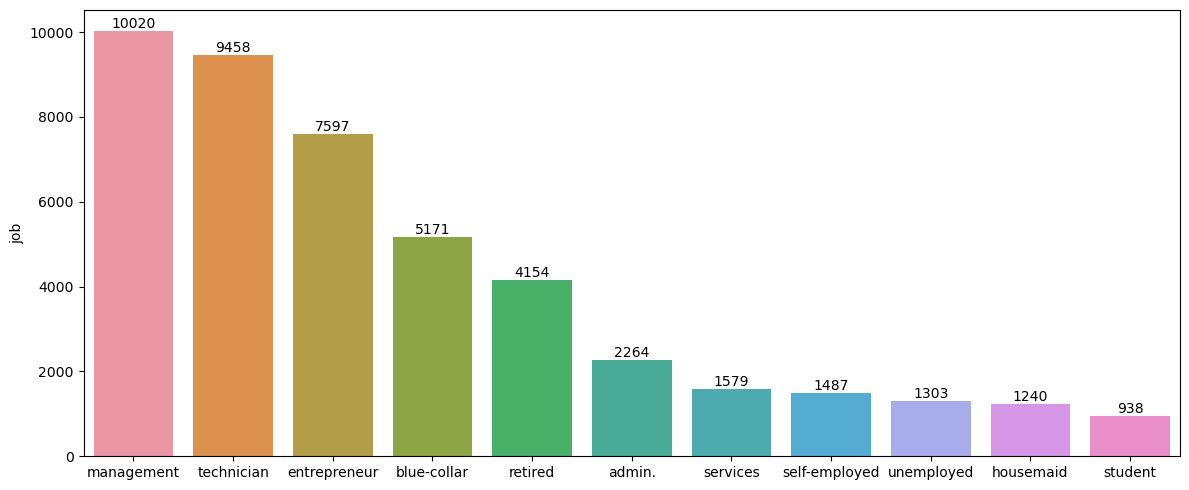

In [43]:
# JOB Column
plt.figure(figsize = (12,5))
ax = sns.barplot(Bank_data['job'].unique(),Bank_data['job'].value_counts(), data = Bank_data)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

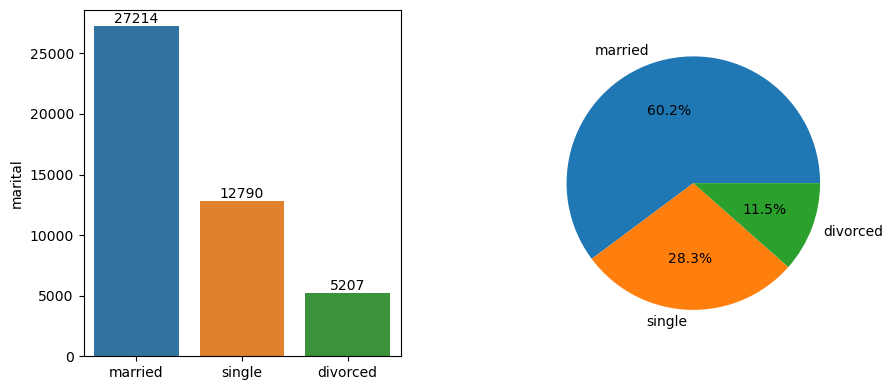

In [44]:
# Marital Column
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
ax = sns.barplot(x=Bank_data['marital'].unique(), y=Bank_data['marital'].value_counts())
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.pie(Bank_data['marital'].value_counts(), labels=Bank_data['marital'].unique(), autopct='%1.1f%%', )
plt.tight_layout(w_pad=10)
plt.show()

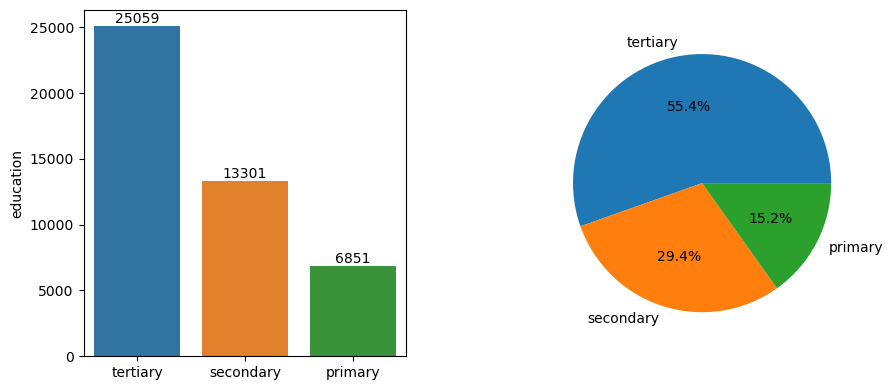

In [45]:
# Education Column
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
ax = sns.barplot(x=Bank_data['education'].unique(), y=Bank_data['education'].value_counts())
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.pie(Bank_data['education'].value_counts(),labels=Bank_data['education'].unique(),autopct='%1.1f%%')
plt.tight_layout(w_pad=10)
plt.show()

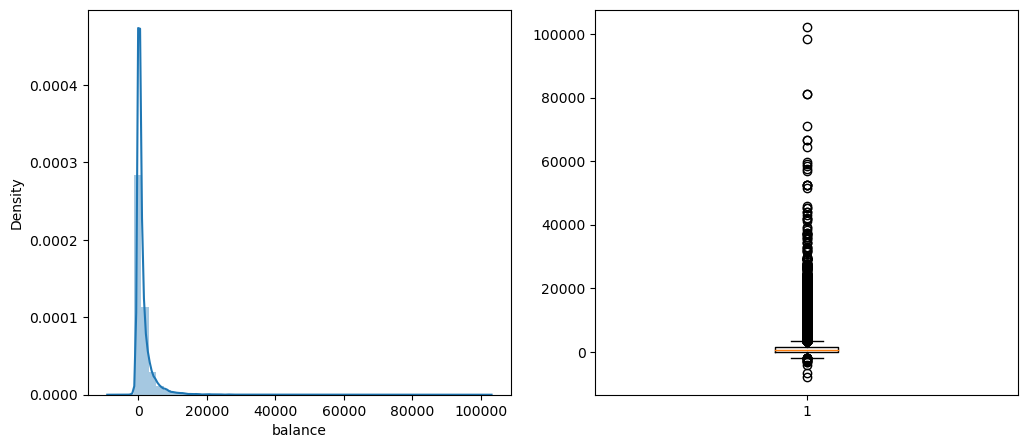

In [46]:
# balance column
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(Bank_data['balance']);
plt.subplot(1,2,2)
plt.boxplot(Bank_data['balance']);

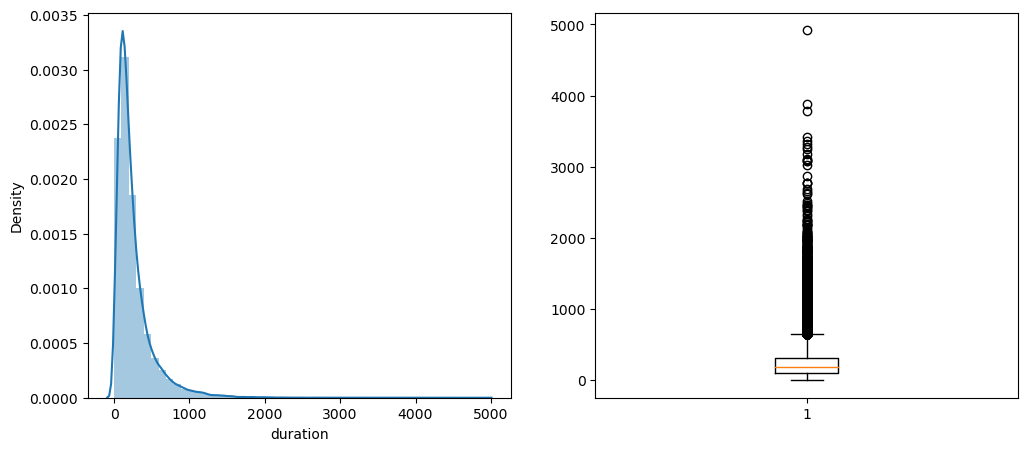

In [47]:
# duration column
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(Bank_data['duration']);
plt.subplot(1,2,2)
plt.boxplot(Bank_data['duration']);

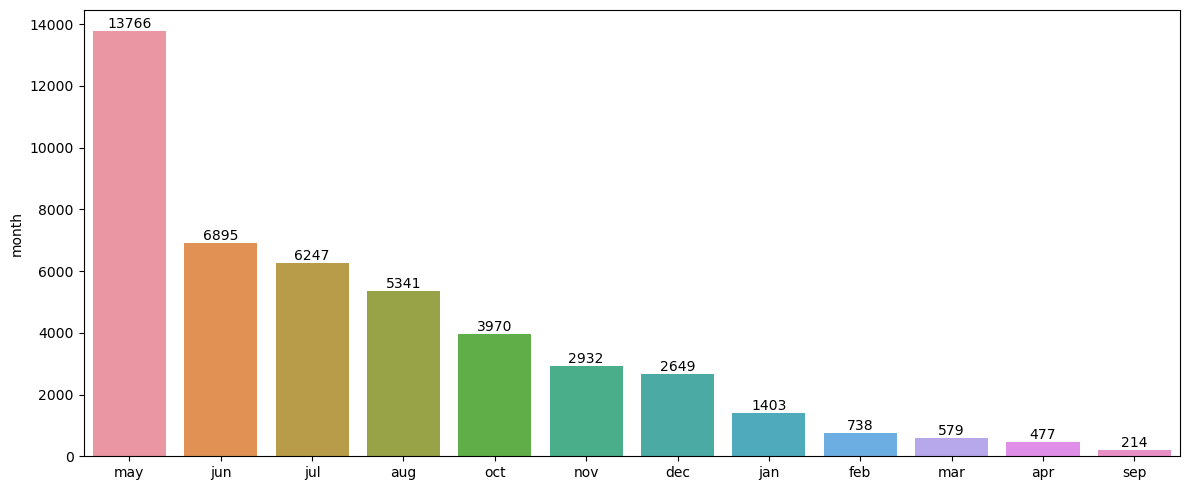

In [48]:
# Number of calls make in each month.
plt.figure(figsize = (12,5))
ax = sns.barplot(x=Bank_data['month'].unique(), y=Bank_data['month'].value_counts(), data=Bank_data);
ax.bar_label(ax.containers[0]);
plt.tight_layout()

In [49]:
# Data obtain after performing EDA
Bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [50]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [51]:
Bank_data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,11,3,3,2,2,2,2,12,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,no
freq,10020,27214,25059,44396,25130,37967,42305,13766,39922


In [52]:
# Creating new variable for model building with dummy variables.
Bank_data_new = pd.get_dummies(Bank_data, columns=['job','marital','education','contact'])

In [53]:
pd.set_option('display.max.columns', None)

In [54]:
Bank_data_new.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [55]:
# Checking unique values present in month column.
Bank_data_new['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [56]:
# Assigning numeric values to months.
Bank_data_new['month'] = Bank_data['month'].replace({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})

In [57]:
# Checking Data.
Bank_data_new.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,no,2143,yes,no,5,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,44,no,29,yes,no,5,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,33,no,2,yes,yes,5,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,47,no,1506,yes,no,5,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,33,no,1,no,no,5,5,198,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [58]:
# Binary encoding
Bank_data_new['default'] = np.where(Bank_data_new['default'].str.contains("yes"), 1, 0)
Bank_data_new['housing'] = np.where(Bank_data_new['housing'].str.contains("yes"), 1, 0)
Bank_data_new['loan'] = np.where(Bank_data_new['loan'].str.contains("yes"), 1, 0)
Bank_data_new['y'] = np.where(Bank_data_new['y'].str.contains("yes"), 1, 0)

In [59]:
# Final data for model building.
Bank_data_new.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [60]:
Bank_data_new.shape

(45211, 31)

In [61]:
Bank_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int32
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

###### Model Building

In [62]:
# import libraries
from sklearn.linear_model import LogisticRegression

In [63]:
# Dividing our data into input and output variables 
X = pd.concat([Bank_data_new.iloc[:, 0:11],Bank_data_new.iloc[:, 12:]], axis=1)
Y = Bank_data_new.iloc[:,11]

In [64]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

###### model predictions

In [65]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
y_pred_df = pd.DataFrame({'Actual_y': Y, 'Predicted_y': y_pred})
y_pred_df

,Actual_y,Predicted_y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


###### Testing model accuracy

In [67]:
# Confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(Y, y_pred)
print(Confusion_matrix)

[[39181   741]
 [ 4350   939]]


In [68]:
# Calculating model accuracy by formula. (a+d)/(a+b+c+d)
(39181+939)/(39181+741+4350+939)*100

88.7394660591449

In [69]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [70]:
# Calculating probability.
probability = classifier.predict_proba(X)[:,1] 
probability

array([0.09310415, 0.07734968, 0.07578064, ..., 0.3468588 , 0.06466212,
       0.57292228])

In [71]:
y_pred_df['Probability'] = probability
y_pred_df

,Actual_y,Predicted_y,Probability
0,0,0,0.093104
1,0,0,0.077350
2,0,0,0.075781
3,0,0,0.052158
4,0,0,0.159564
...,...,...,...
45206,1,0,0.413015
45207,1,0,0.099088
45208,1,0,0.346859
45209,0,0,0.064662


###### ROC Curve

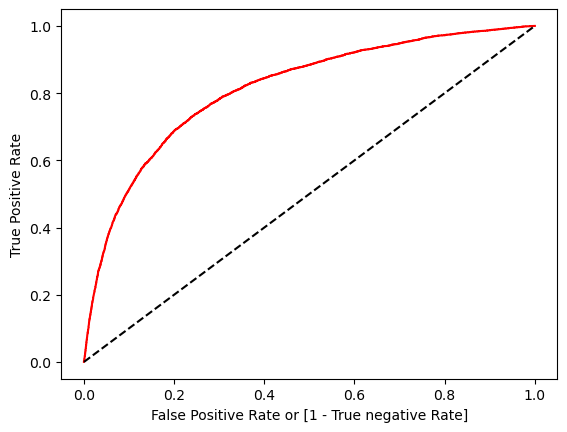

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr,tpr,color='red', label='logit model (area = %0.2f)' %auc);
plt.plot([0,1],[0,1], 'k--');
plt.xlabel('False Positive Rate or [1 - True negative Rate]');
plt.ylabel('True Positive Rate');

In [73]:
print('auc =', auc*100)

auc = 57.94885463409179


## =======================================================================